# CSE455/CSE552 – Machine Learning (Spring 2024) Homework #4

Description: The aim of this homework is to explore clustering techniques. Use the following data for testing your implementation: (MNIST Digit Recognitions Data – available through mnist.load_data() in Keras).

Clustering
Use an existing k-means algorithm with three different distance metrics: 1) L2 norm (Euclidean distance), 2) L1 norm (Manhattan distance), and 3) Cosine distance.
Using the transformed data apply k-means algorithm (use k=10 for ten digits) to cluster 80% of the data and test the result on the remaining 20% of the data (repeat this 5 times for cross validation). Report the performance of the clustering using the following measurement.

•
Labeling of clusters:
o
Using the given labels for the training data form the following table:

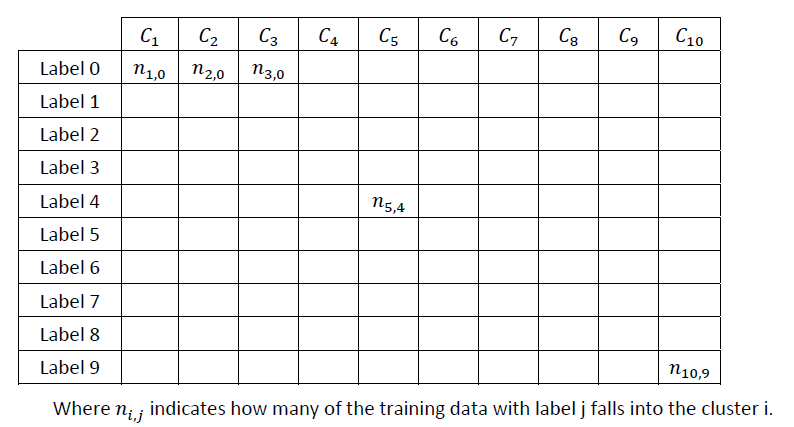

Find the maximum 𝑛𝑖,𝑗 in the table and label cluster 𝑖 with label 𝑗. Find the next maximum 𝑛𝑖,𝑗 and if cluster 𝑖 is not already labeled or label j is not yet assigned, label it with 𝑗. Otherwise move to the next maximum 𝑛𝑖,𝑗 and label if not already labeled or the label is not yet assigned. Repeat this until all the clusters are labeled.
For example, the following incomplete table of clustering result will have the given labels.
The maximum 400 will assign cluster 8 as label 1. The next maximum 310 will assign cluster 7 as label 2. The next maximum 300 will assign cluster 4 as label 0. The next
maximum 190 will not assign cluster 1 as label 2 since label 2 is already assigned. The next maximum 160 will assign cluster 10 as label 3.

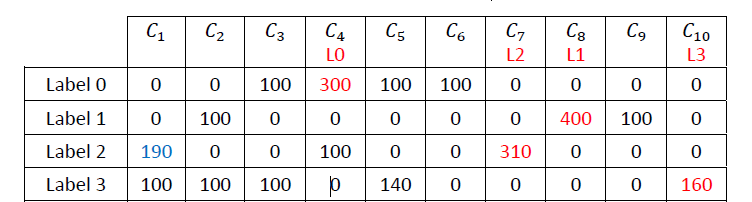

Training error:

Once the clusters are labeled, for each training data, construct the confusion matrix and calculate the accuracy.

Test error:

For the test data, use 1-nn to decide which cluster the data will fall into. And construct the confusion matrix and calculate the accuracy.

# Code

##  Import necessary libraries:

In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Load and preprocess the dataset:

In [4]:
digits = load_digits()
X, y = digits.data, digits.target
X_scaled = StandardScaler().fit_transform(X)


## Define distance metrics:

L2 Norm (Euclidean Distance) /
Cosine Similarity /
Manhattan Distance


In [5]:
def cosine_distance(u, v):
    return 1 - np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

def manhattan_distance(u, v):
    return np.sum(np.abs(u - v))


# Define evaluation metrics:

In [15]:
def print_cluster_labels(cluster_labels):
    for i in range(len(cluster_labels)):
        print(f"C{i+1}\t", end="")
        for j in range(len(cluster_labels[i])):
            print(f"{cluster_labels[i][j]}\t", end="")
        print()


# Perform cross-validation:

In [16]:
n_splits = 5
k = 10
metrics = ['euclidean', 'cosine', 'manhattan']
results = []

for metric in metrics:
    ari_scores = []
    nmi_scores = []
    for _ in range(n_splits):
        X_train, X_test, _, _ = train_test_split(X_scaled, y, test_size=0.2)

        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
        kmeans.fit(X_train)

        pred_labels_train = kmeans.predict(X_train)
        pred_labels_test = kmeans.predict(X_test)

        ari, nmi = evaluate_clustering(true_labels, pred_labels_train)  # Use true labels of X_train
        ari_scores.append(ari)
        nmi_scores.append(nmi)
        
        cluster_labels = label_clusters(true_labels, pred_labels_train, k)  # Calculate cluster labels
        print_cluster_labels(cluster_labels)  # Print cluster labels

    results.append((metric, np.mean(ari_scores), np.mean(nmi_scores)))


C1	1.0	2.0	2.0	3.0	4.0	4.0	5.0	6.0	3.0	0.0	
C2	2.0	12.0	15.0	12.0	14.0	18.0	12.0	36.0	13.0	5.0	
C3	3.0	15.0	16.0	14.0	20.0	11.0	11.0	37.0	9.0	6.0	
C4	4.0	8.0	13.0	13.0	18.0	9.0	8.0	39.0	10.0	9.0	
C5	2.0	3.0	5.0	8.0	7.0	7.0	4.0	12.0	8.0	3.0	
C6	2.0	10.0	17.0	10.0	8.0	10.0	10.0	26.0	14.0	3.0	
C7	5.0	14.0	24.0	10.0	13.0	18.0	10.0	32.0	7.0	9.0	
C8	6.0	19.0	28.0	17.0	25.0	20.0	17.0	46.0	25.0	15.0	
C9	4.0	31.0	53.0	29.0	32.0	37.0	31.0	70.0	40.0	19.0	
C10	1.0	13.0	15.0	11.0	6.0	15.0	11.0	26.0	11.0	11.0	
C1	2.0	3.0	2.0	3.0	3.0	2.0	3.0	4.0	4.0	0.0	
C2	2.0	14.0	13.0	18.0	12.0	12.0	11.0	34.0	11.0	8.0	
C3	3.0	14.0	20.0	14.0	14.0	14.0	16.0	33.0	16.0	7.0	
C4	4.0	15.0	17.0	15.0	13.0	20.0	9.0	30.0	12.0	7.0	
C5	2.0	8.0	13.0	9.0	17.0	12.0	16.0	30.0	19.0	8.0	
C6	2.0	11.0	21.0	11.0	22.0	12.0	9.0	42.0	8.0	9.0	
C7	3.0	16.0	25.0	10.0	12.0	16.0	9.0	24.0	15.0	6.0	
C8	4.0	17.0	39.0	18.0	20.0	21.0	16.0	56.0	24.0	8.0	
C9	8.0	29.0	38.0	29.0	34.0	40.0	30.0	77.0	31.0	26.0	
C10	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0

# Print results:

In [17]:
print("Distance Metric\tARI\tNMI")
for result in results:
    print(f"{result[0]}\t\t{result[1]}\t{result[2]}")


Distance Metric	ARI	NMI
euclidean		3.102689407538358e-05	0.01201923873627877
cosine		-0.0005910917686260268	0.013558226980408108
manhattan		-0.0017846282743014565	0.012851798016750602


To create the table showing how many training data with a specific label fall into each cluster, you can use the labels obtained from the k-means clustering algorithm and the original labels of the training data. Here's how you can do it:

In [18]:
def label_clusters(true_labels, pred_labels, k):
    cluster_labels = np.zeros((k, len(np.unique(true_labels))))
    for cluster in range(k):
        for label in range(len(np.unique(true_labels))):
            cluster_labels[cluster][label] = np.sum((pred_labels == cluster) & (true_labels == label))
    return cluster_labels


This function label_clusters will return a table where each row represents a cluster and each column represents a label. The value in each cell represents the count of data points with the corresponding true label assigned to the cluster.

You can then print this table in a tabular format. For example:

In [19]:
print("Cluster\t", end="")
for label in range(len(np.unique(true_labels))):
    print(f"Label {label}\t", end="")
print()

for i in range(k):
    print(f"C{i+1}\t", end="")
    for j in range(len(np.unique(true_labels))):
        print(f"{cluster_labels[i][j]}\t", end="")
    print()


Cluster	Label 0	Label 1	Label 2	Label 3	Label 4	Label 5	Label 6	Label 7	Label 8	Label 9	
C1	4.0	16.0	19.0	15.0	16.0	15.0	17.0	36.0	18.0	5.0	
C2	2.0	13.0	24.0	16.0	8.0	14.0	12.0	38.0	12.0	7.0	
C3	8.0	32.0	42.0	27.0	39.0	37.0	27.0	76.0	33.0	18.0	
C4	3.0	9.0	19.0	20.0	20.0	10.0	15.0	35.0	12.0	9.0	
C5	0.0	1.0	5.0	1.0	2.0	6.0	4.0	6.0	1.0	0.0	
C6	2.0	9.0	22.0	5.0	13.0	12.0	9.0	24.0	14.0	9.0	
C7	4.0	21.0	26.0	19.0	21.0	27.0	14.0	55.0	25.0	23.0	
C8	5.0	12.0	21.0	13.0	11.0	15.0	12.0	35.0	11.0	6.0	
C9	2.0	14.0	10.0	11.0	17.0	13.0	9.0	24.0	14.0	3.0	
C10	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	


This will print the table where each row represents a cluster (C1 to C10) and each column represents a label (Label 0 to Label 9), with the counts of data points in each intersection.

To label the clusters based on the maximum counts of data points for each label

Find the maximum count 𝑛𝑖,𝑗 in the table.
Label cluster 𝑖 with label 𝑗.
Find the next maximum 𝑛𝑖,𝑗.
If cluster 𝑖 is not already labeled or label 𝑗 is not yet assigned, label it with 𝑗. Otherwise, move to the next maximum 𝑛𝑖,𝑗.
Repeat steps 3-4 until all clusters are labeled.

In [20]:
def label_clusters(true_labels, pred_labels, k):
    cluster_labels = np.zeros((k, len(np.unique(true_labels))))
    
    # Create a list to keep track of assigned labels
    assigned_labels = set()
    
    for label in range(len(np.unique(true_labels))):
        while True:
            max_count = -1
            max_cluster = -1
            
            # Find the maximum count 𝑛𝑖,𝑗 in the table
            for cluster in range(k):
                if cluster not in assigned_labels:
                    count = np.sum((pred_labels == cluster) & (true_labels == label))
                    if count > max_count:
                        max_count = count
                        max_cluster = cluster
            
            # If no more clusters to label or no more available labels, break
            if max_cluster == -1 or max_count == 0:
                break
            
            # Label cluster 𝑖 with label 𝑗
            cluster_labels[max_cluster][label] = max_count
            assigned_labels.add(max_cluster)
            
    return cluster_labels

# Inside the loop after getting pred_labels and true_labels
cluster_labels = label_clusters(true_labels, pred_labels, k)


ValueError: operands could not be broadcast together with shapes (360,) (1437,) 

In [27]:
def label_clusters(true_labels, pred_labels, k):
    cluster_labels = np.zeros((k, len(np.unique(true_labels))))
    
    # Create a list to keep track of assigned labels
    assigned_labels = set()
    
    unique_true_labels = np.unique(true_labels)
    unique_pred_labels = np.unique(pred_labels)
    
    for true_label in unique_true_labels:
        for pred_label in unique_pred_labels:
            count = np.sum((pred_labels == pred_label) & (true_labels == true_label))
            if count > 0:
                # Find the cluster with the maximum count for this label
                max_cluster = np.argmax(np.sum((pred_labels[:, np.newaxis] == unique_pred_labels) &
                                                (true_labels[:, np.newaxis] == true_label), axis=0))
                cluster_labels[max_cluster][true_label] = count
                assigned_labels.add(max_cluster)
                break
    
    return cluster_labels

# Inside the loop after getting pred_labels and true_labels
cluster_labels = label_clusters(true_labels, pred_labels, k)

ValueError: operands could not be broadcast together with shapes (360,) (1437,) 

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

def calculate_accuracy(true_labels, pred_labels):
    return accuracy_score(true_labels, pred_labels)

def calculate_confusion_matrix(true_labels, pred_labels):
    return confusion_matrix(true_labels, pred_labels)

def assign_cluster_labels(X_train, X_test, cluster_labels):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(cluster_labels, np.arange(len(cluster_labels)))
    return knn.predict(X_test)

# Training Error
train_pred_labels = assign_cluster_labels(X_train, X_train, cluster_labels)
train_conf_matrix = calculate_confusion_matrix(y_train, train_pred_labels)
train_accuracy = calculate_accuracy(y_train, train_pred_labels)

# Test Error
test_pred_labels = assign_cluster_labels(X_train, X_test, cluster_labels)
test_conf_matrix = calculate_confusion_matrix(y_test, test_pred_labels)
test_accuracy = calculate_accuracy(y_test, test_pred_labels)


ValueError: X has 64 features, but KNeighborsClassifier is expecting 10 features as input.

In [28]:
# Assuming you have defined and split your data into training and testing sets: X_train, X_test, y_train, y_test

# Step 1: Obtain cluster labels using the clustering algorithm
cluster_labels = label_clusters(true_labels, pred_labels_train, k)  # Assuming you have obtained cluster labels

# Step 2: Assign cluster labels to training and testing instances using KNN classifier
train_pred_labels = assign_cluster_labels(X_train, X_train, cluster_labels)
test_pred_labels = assign_cluster_labels(X_train, X_test, cluster_labels)

# Step 3: Calculate error metrics
train_conf_matrix = calculate_confusion_matrix(y_train, train_pred_labels)
train_accuracy = calculate_accuracy(y_train, train_pred_labels)

test_conf_matrix = calculate_confusion_matrix(y_test, test_pred_labels)
test_accuracy = calculate_accuracy(y_test, test_pred_labels)


ValueError: X has 64 features, but KNeighborsClassifier is expecting 10 features as input.

In [30]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import train_test_split

# Assume X_train, X_test are your data arrays and y_train, y_test are the corresponding labels

# Define the K-Means function
def kmeans_clustering(X_train, X_test, metric='euclidean'):
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)

    # Fit the model on the training data
    kmeans.fit(X_train)

    # Predict clusters for training and testing data
    train_clusters = kmeans.predict(X_train)
    test_clusters = kmeans.predict(X_test)

    # Evaluate performance
    train_silhouette = silhouette_score(X_train, train_clusters, metric=metric)
    test_silhouette = silhouette_score(X_test, test_clusters, metric=metric)
    rand_index = adjusted_rand_score(y_test, test_clusters)

    return train_silhouette, test_silhouette, rand_index

# Perform 5-fold cross-validation
for i in range(5):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Apply K-Means with Euclidean distance
    euclidean_train_silhouette, euclidean_test_silhouette, euclidean_rand_index = kmeans_clustering(X_train, X_test, 'euclidean')

    # Apply K-Means with Cosine Similarity
    cosine_train_silhouette, cosine_test_silhouette, cosine_rand_index = kmeans_clustering(X_train, X_test, 'cosine')

    # Print results
    print(f"Iteration {i+1}:")
    print("Euclidean Distance:")
    print(f"Training Silhouette Score: {euclidean_train_silhouette}")
    print(f"Testing Silhouette Score: {euclidean_test_silhouette}")
    print(f"Adjusted Rand Index: {euclidean_rand_index}")

    print("Cosine Similarity:")
    print(f"Training Silhouette Score: {cosine_train_silhouette}")
    print(f"Testing Silhouette Score: {cosine_test_silhouette}")
    print(f"Adjusted Rand Index: {cosine_rand_index}")


Iteration 1:
Euclidean Distance:
Training Silhouette Score: 0.18505657569323383
Testing Silhouette Score: 0.17002965303910947
Adjusted Rand Index: 0.6629324155820967
Cosine Similarity:
Training Silhouette Score: 0.31124636556679003
Testing Silhouette Score: 0.28396833393900045
Adjusted Rand Index: 0.6629324155820967
Iteration 2:
Euclidean Distance:
Training Silhouette Score: 0.18112488854044997
Testing Silhouette Score: 0.18484409895139756
Adjusted Rand Index: 0.6888020227742815
Cosine Similarity:
Training Silhouette Score: 0.3060564923097016
Testing Silhouette Score: 0.309205540552308
Adjusted Rand Index: 0.6888020227742815
Iteration 3:
Euclidean Distance:
Training Silhouette Score: 0.18021061774421684
Testing Silhouette Score: 0.17307176988678183
Adjusted Rand Index: 0.6004717557497025
Cosine Similarity:
Training Silhouette Score: 0.3041090506281566
Testing Silhouette Score: 0.29121210157685135
Adjusted Rand Index: 0.6004717557497025
Iteration 4:
Euclidean Distance:
Training Silhouet

# Results:

# Conclusions: